                                                                                             Author: Pooja kanvar Rajput
 # GRIP @The sparks Foundation                                                                                     
## Task 1:- Prediction using Supervised ML(Level - Beginer)
   ### To Predict the percentage of an student based on the no. of study hours.
    

# Importing all the required libraries.

In [27]:
import pandas as pd  #import the Pandas to import and analyze data
import numpy as np   #NumPy to perform the multi-dimensional operation 
import matplotlib.pyplot as plt #matplotlib to perform graphical plot into the context. 
import seaborn as sns # use for  a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.model_selection import train_test_split #Scikit-learn is a Simple and efficient tools for predictive data analysis 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

## Reading the data 
The next phase is to load the data into the program to perform the desired operation. Here we use the pandas to load the csv data and when data is successfully loaded we print a statement  to get confirmation.

In [9]:
data = pd.read_csv('http://bit.ly/w-data')
print("Successfully imported data into console" )  


Successfully imported data into console


## To view the data and using the head() function
The head function default view is the top five, but again whatever you want to be in the number of views you can do it as entered, in this case, I have entered six views.

In [13]:
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


## Data Exploration 

In [16]:
data.shape #To check the shape of dataset

(25, 2)

In [18]:
data.info() #To check the info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
data.describe() # checking the description of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization
The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

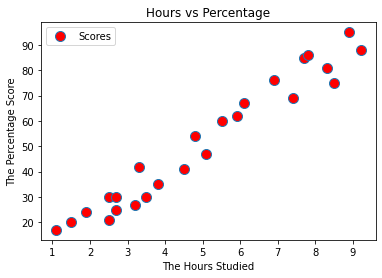

In [21]:
data.plot(x='Hours', y='Scores', style='o',markersize=10, markerfacecolor='red',)  
plt.title('Hours vs Percentage')  
plt.xlabel('The Hours Studied')  
plt.ylabel('The Percentage Score')  
plt.show()

**From the above scatter plot there looks to be correlation between the 'The Percentage Score' and 'The Hours Studied', Lets plot a regression line to confirm the correlation.**

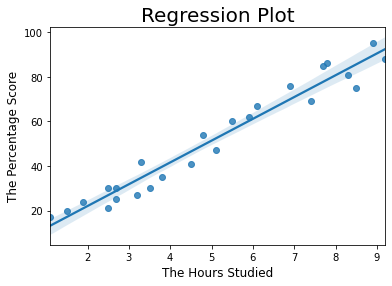

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [37]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('The Percentage Score', size=12)
plt.xlabel('The Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**



## Training the Model
The process of dividing the data into attributes and labels is our next task, so  implement the same as below.

In [38]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### 1) Splitting the Data

The split of data into the training and test sets is very important as in this time we will be using Scikit Learn's builtin method of train_test_split(), as below:

In [39]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model
The very next process is to train the algorithm, thus the step include the following:

In [40]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [41]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted  with the Actual values
Comparing the actual versus predicted model to understand our model fitting,

In [43]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted  with the Actual values 

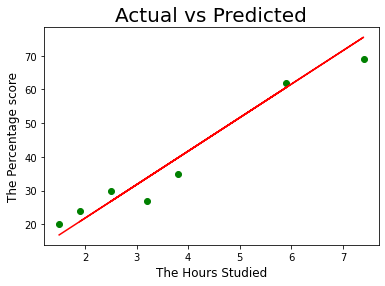

In [46]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('The Percentage score', size=12)
plt.xlabel('The Hours Studied', size=12)
plt.show()

## Evaluating the Model
Calculating the accuracy of the model

In [47]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

Now it's time to test our model with sample testing hours, so in this case, we take 9.25 hours, i.e, if a student studies for seven hours, approximately how many marks he can get based on the data we received and the model we applied.

In [49]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89**